## Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data= pd.read_csv('Customer_Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#checking null values in the dataset
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

There is no null values thus we can proceed. And our target variable is **TotalCharges**

In [5]:
#checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that the "Totalcharges" has a continuous data but it is an object type. lets handle this column.

In [6]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
data[data['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observations, we say some columns have space as the value.

In [8]:
data['TotalCharges']= data['TotalCharges'].replace(" ",np.nan)

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#converting the column into float
data['TotalCharges']=data['TotalCharges'].astype(float)

In [11]:
data.TotalCharges.dtype

dtype('float64')

Now we can see total charges columns has some space values which is replaced by null vlaues. 

Now we will handle the null values .

In [12]:
#replacing the null values with mean of the column
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
#making dataframe for the nominal data
data_nominal= data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                   'PaymentMethod','Churn']].copy()

In [15]:
data_nominal

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


Male      3555
Female    3488
Name: gender, dtype: int64


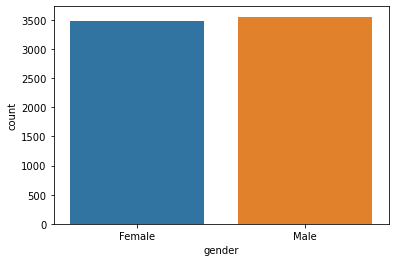

In [16]:
#visualising the nominal datas to see the count of the classes in each column
sns.countplot(x="gender",data= data_nominal)
print(data_nominal.gender.value_counts())

From the observation, total number of male is 3

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


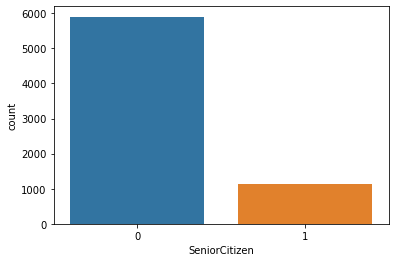

In [17]:
sns.countplot(x="SeniorCitizen",data= data_nominal)
print(data_nominal.SeniorCitizen.value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


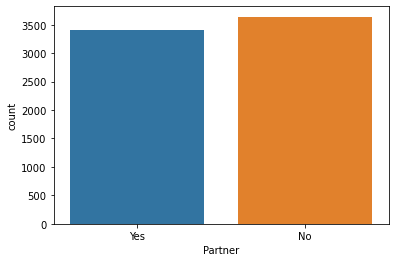

In [18]:
sns.countplot(x="Partner",data= data_nominal)
print(data_nominal.Partner.value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


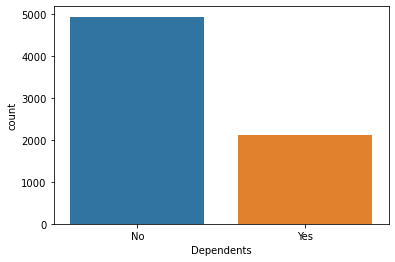

In [19]:
sns.countplot(x="Dependents",data= data_nominal)
print(data_nominal.Dependents.value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


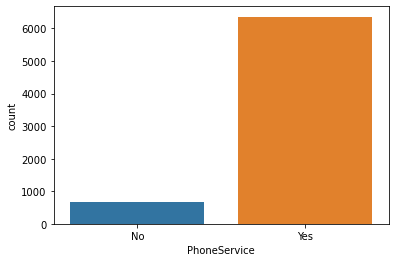

In [20]:
sns.countplot(x="PhoneService",data= data_nominal)
print(data_nominal.PhoneService.value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


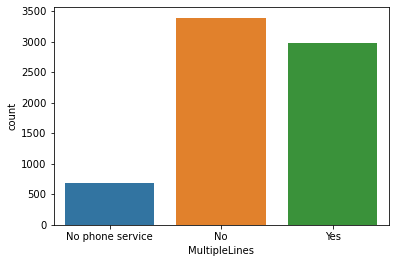

In [21]:
sns.countplot(x="MultipleLines",data= data_nominal)
print(data_nominal.MultipleLines.value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


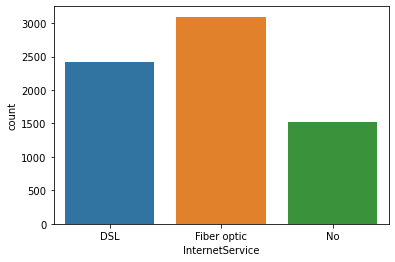

In [22]:
sns.countplot(x="InternetService",data= data_nominal)
print(data_nominal.InternetService.value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


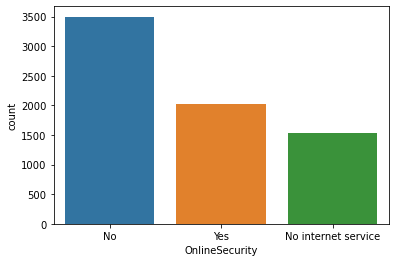

In [23]:
sns.countplot(x="OnlineSecurity",data= data_nominal)
print(data_nominal.OnlineSecurity.value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


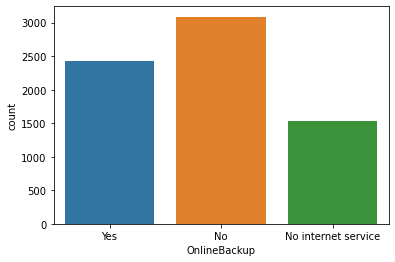

In [24]:
sns.countplot(x="OnlineBackup",data= data_nominal)
print(data_nominal.OnlineBackup.value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


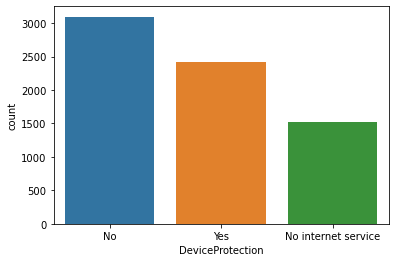

In [25]:
sns.countplot(x="DeviceProtection",data= data_nominal)
print(data_nominal.DeviceProtection.value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


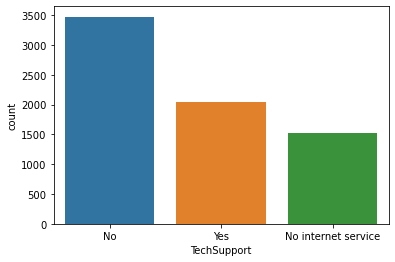

In [26]:
sns.countplot(x="TechSupport",data= data_nominal)
print(data_nominal.TechSupport.value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


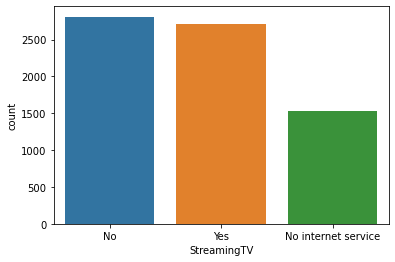

In [27]:
sns.countplot(x="StreamingTV",data= data_nominal)
print(data_nominal.StreamingTV.value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


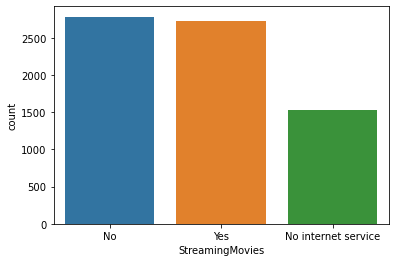

In [28]:
sns.countplot(x="StreamingMovies",data= data_nominal)
print(data_nominal.StreamingMovies.value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


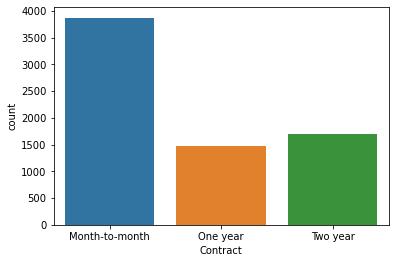

In [29]:
sns.countplot(x="Contract",data= data_nominal)
print(data_nominal.Contract.value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


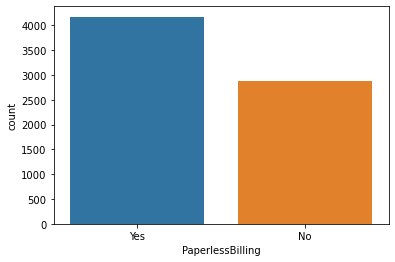

In [30]:
sns.countplot(x="PaperlessBilling",data= data_nominal)
print(data_nominal.PaperlessBilling.value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


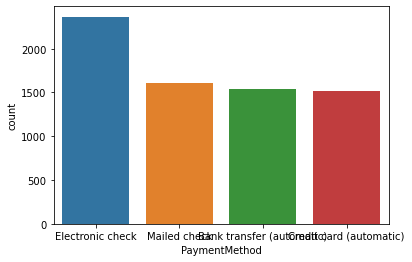

In [31]:
sns.countplot(x="PaymentMethod",data= data_nominal)
print(data_nominal.PaymentMethod.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


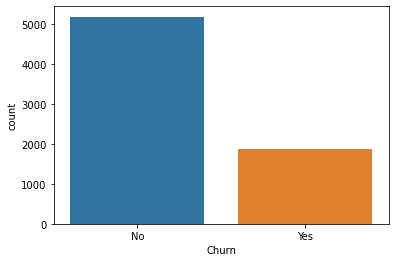

In [32]:
sns.countplot(x="Churn",data= data_nominal)
print(data_nominal.Churn.value_counts())

For ordinal categorical data we will use lineplot as it gives the flow of line of the classes of the column.

In [33]:
  #making dataframe for ordinal data
data_ordinal= data[['customerID','tenure']].copy()

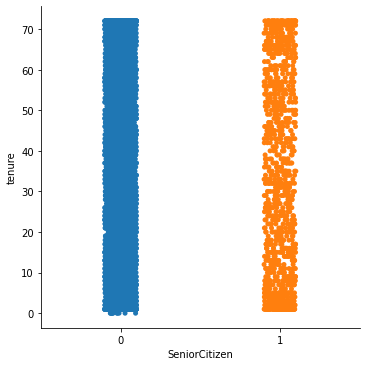

In [34]:
sns.catplot(x='SeniorCitizen', y='tenure',data=data)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

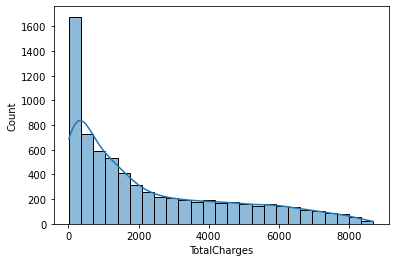

In [35]:
#checking the distribution of the continuous value of the float type column
data_continuous= data[['MonthlyCharges','TotalCharges']]
sns.histplot(data_continuous.TotalCharges,kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

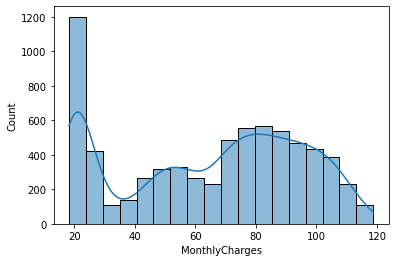

In [36]:
sns.histplot(data_continuous.MonthlyCharges,kde=True)

Since the dataset has a lot of string values. we will use the encoding technique to convert the string data to numerical data.

In [37]:
#encoding the categorical dataframe
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [38]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [39]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [40]:
#statistical description
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

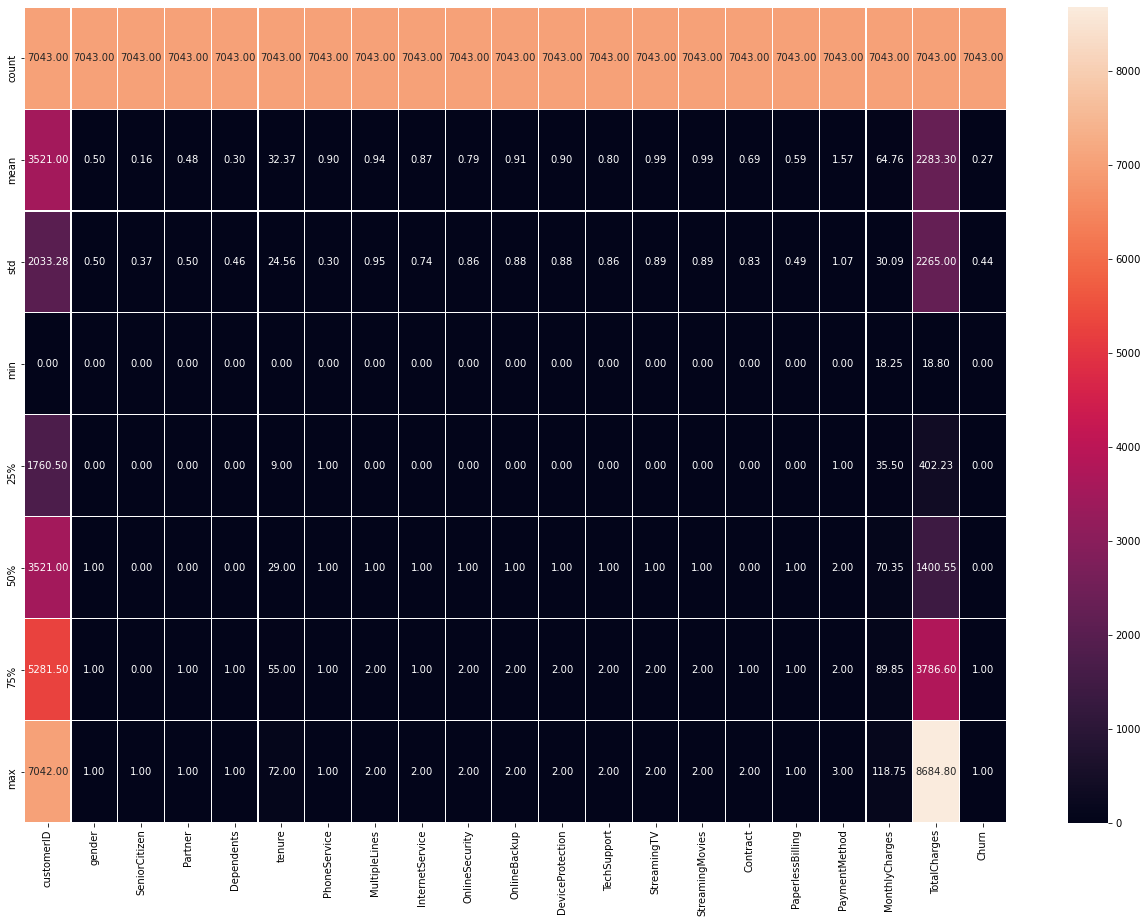

In [41]:
plt.figure(figsize=(22,15))

sns.heatmap(data.describe(),annot=True, linewidths=0.1,linecolor='white',fmt="0.2f")

In [42]:
#correlation of the column with the target columns
corr_data= data.corr()
corr_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

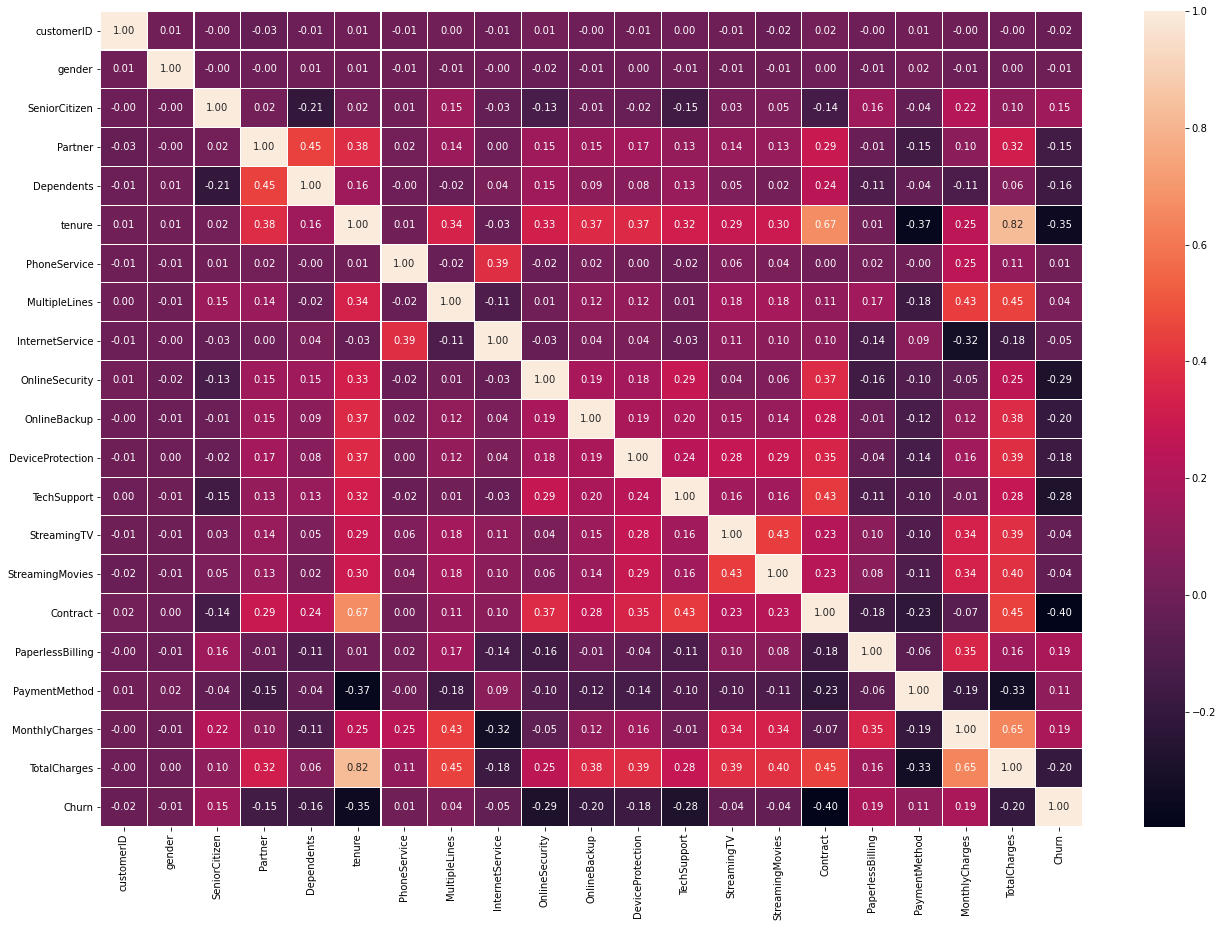

In [43]:
plt.figure(figsize=(22,15))

sns.heatmap(corr_data,annot=True, linewidths=0.1,linecolor='white',fmt="0.2f")

checking the column which is positively and negatively correlated with the target columns

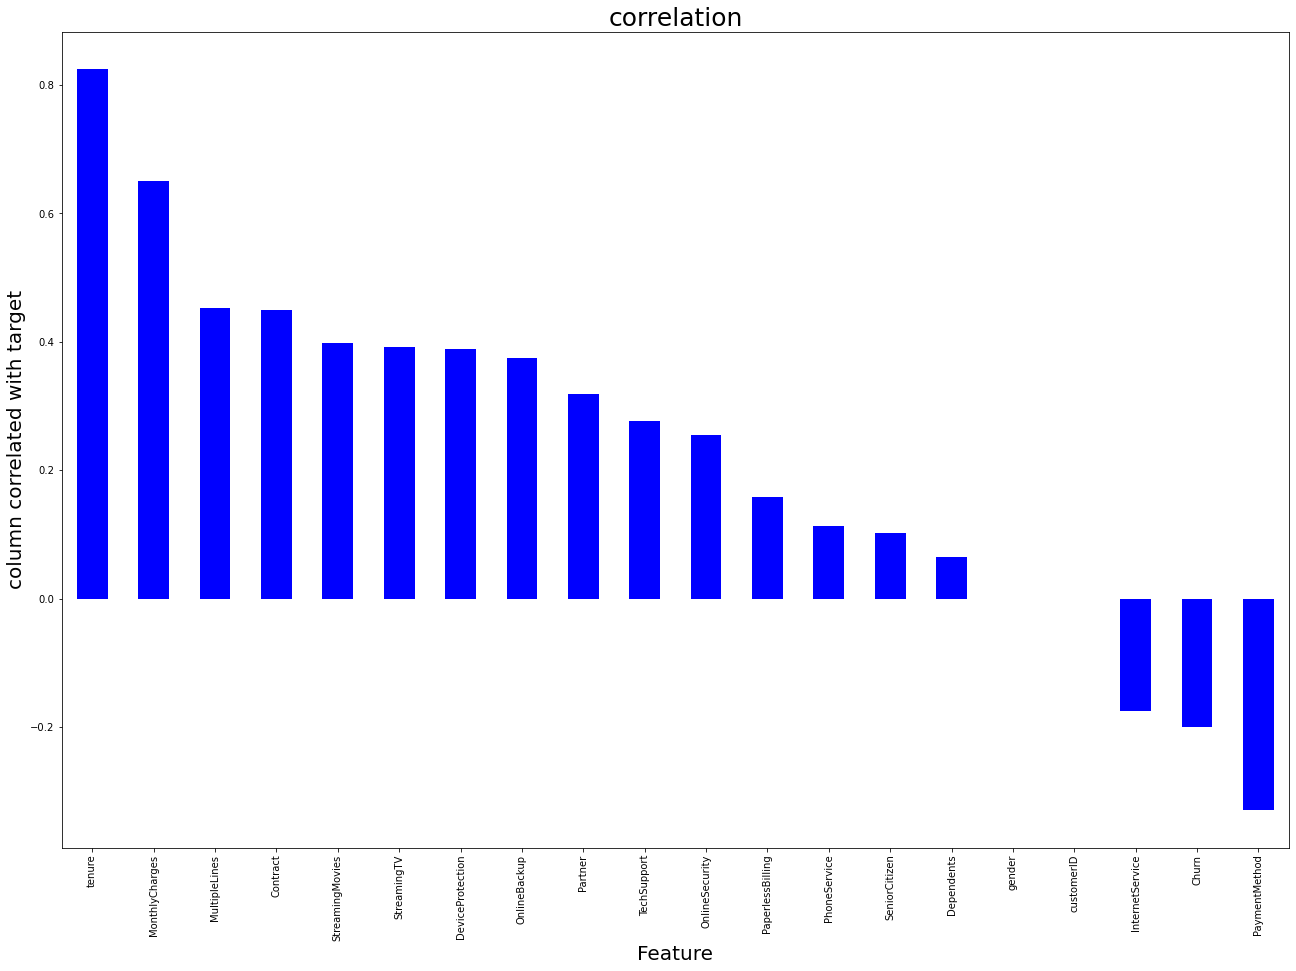

In [44]:
plt.figure(figsize=(22,15),facecolor='white')

corr_data.TotalCharges.sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('column correlated with target', fontsize=20)
plt.title('correlation',fontsize=25)
plt.show()

In [45]:
#skewness of the dataset
data.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

keeping +/- 0.5 as the range of skewness. here are the column which does not lie within this range 
 - SeniorCitizen -categorical
 - Dependents -categorical
 - PhoneService-categorical
 - contact- categorical
 - otalCharges-target variable
 - churn- categorical
 
 Since no continous variable has skew we will keep these.

In [46]:
#outliers for in int variables
data.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

<AxesSubplot:>

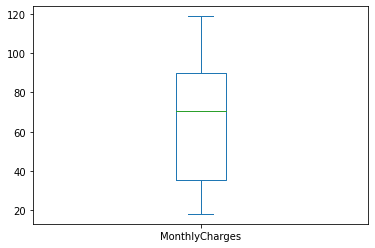

In [47]:
data.MonthlyCharges.plot.box()

<AxesSubplot:>

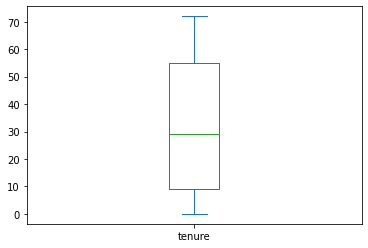

In [48]:
data.tenure.plot.box()

In [49]:
#removing outliers
print(data.shape)

from scipy.stats import zscore
z= np.abs(zscore(data))
threshold=3
np.where(z>3)

(7043, 21)


(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [50]:
new_data= data[(z<3).all(axis=1)]
new_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [51]:
#percentage loss of data:
loss_per= ((7043-6361)/7043)*100
loss_per

9.683373562402386

Our data is becoming biased as it is not considering the case of Senior citizens. thus we will not remove outliers.

In [52]:
#separating features and target
x= data.drop(columns='TotalCharges')
y= data.TotalCharges

In [53]:
#scaling the features
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [54]:
for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    test_pred= lr.predict(x_test)
    train_pred= lr.predict(x_train)
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train,train_pred)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,test_pred)}')
    print('\n')

At random state 0, the training accuracy is: 0.9058706722803965
At random state 0, the testing accuracy is: 0.8977317673785854


At random state 1, the training accuracy is: 0.9052277082152647
At random state 1, the testing accuracy is: 0.9003132716690803


At random state 2, the training accuracy is: 0.9056858398935237
At random state 2, the testing accuracy is: 0.8984735750686543


At random state 3, the training accuracy is: 0.9044956724241888
At random state 3, the testing accuracy is: 0.9032713403489678


At random state 4, the training accuracy is: 0.9031354749784841
At random state 4, the testing accuracy is: 0.9085937883962479


At random state 5, the training accuracy is: 0.9026338340566921
At random state 5, the testing accuracy is: 0.9101290251842342


At random state 6, the training accuracy is: 0.9028087364691222
At random state 6, the testing accuracy is: 0.9097783155230829


At random state 7, the training accuracy is: 0.9030731852162728
At random state 7, the testing ac

At random state 78, the training accuracy is: 0.905987042620559
At random state 78, the testing accuracy is: 0.8970084184465956


At random state 79, the training accuracy is: 0.9043756629933157
At random state 79, the testing accuracy is: 0.9036897034456826


At random state 80, the training accuracy is: 0.9053112833890031
At random state 80, the testing accuracy is: 0.9002320463451685


At random state 81, the training accuracy is: 0.9028680398042733
At random state 81, the testing accuracy is: 0.9098705450239994


At random state 82, the training accuracy is: 0.9037206884943083
At random state 82, the testing accuracy is: 0.9063213748017843


At random state 83, the training accuracy is: 0.9042451140153229
At random state 83, the testing accuracy is: 0.9041776566705202


At random state 84, the training accuracy is: 0.9042650538479906
At random state 84, the testing accuracy is: 0.9039071924779171


At random state 85, the training accuracy is: 0.9038522237073595
At random state 85,

In [55]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)

In [56]:
lr.fit(x_train,y_train)
test_pred= lr.predict(x_test)
r2_score(y_test,test_pred)

0.9042173834952025

In [60]:
#cross validation of the model
train_acc=r2_score(y_train,train_pred)
test_acc=r2_score(y_test,test_pred)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cv_mean= cvs.mean()
    print(f'At cross fold {j} the cv score is  {cv_mean}')
    print('\n')

At cross fold 2 the cv score is  0.9033382537767014


At cross fold 3 the cv score is  0.9037012261875313


At cross fold 4 the cv score is  0.9037044584134895


At cross fold 5 the cv score is  0.9036665825623267


At cross fold 6 the cv score is  0.903734902438936


At cross fold 7 the cv score is  0.9035677539347998


At cross fold 8 the cv score is  0.9035565941557734


At cross fold 9 the cv score is  0.9036018659661281




Since the number of folds don't have such impact. so, cv=5 is selected

Here we have handled the problem of overfitting and underfiting by checking the training and testing score

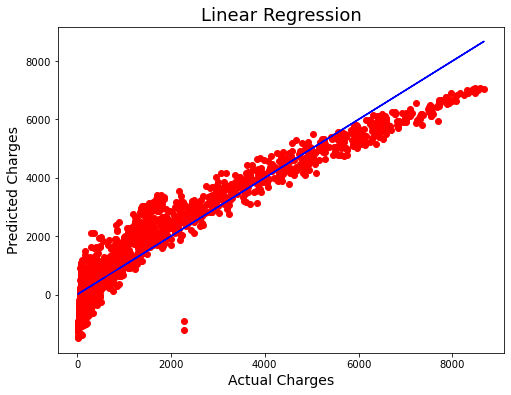

In [61]:
#visualization
plt.figure(figsize=(8,6),facecolor='white')
plt.scatter(x=y_test,y=test_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Best fit line is covering most of the datapoints which shows good fit.

In [62]:
#Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls= Lasso()
gscv= GridSearchCV(ls,param)
gscv.fit(x_train,y_train)
print(f'Best parameters is {gscv.best_params_}')

#final modeling
ls= gscv.best_estimator_
ls.fit(x_train,y_train)
print(f'our model fits {(ls.score(x_train,y_train))*100}% of the dataset')
y_pred= ls.predict(x_test)
print(f'our r2 score is {r2_score(y_test,y_pred)}')

Best parameters is {'alpha': 1, 'random_state': 0}
our model fits 90.42835075238867% of the dataset
our r2 score is 0.9042026267132481


In [63]:
#corss validation of the lasso model
cvs= cross_val_score(ls,x,y,cv=5)
cv_mean= cvs.mean()
cv_mean

0.9036629382160928

In [69]:
#Ensemble Technique
from sklearn.ensemble import RandomForestRegressor

param= {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf= RandomForestRegressor()
gscv= GridSearchCV(rf,param)
gscv.fit(x_train,y_train)
print(f'Best parameters is {gscv.best_params_}')

#final modeling
rf= RandomForestRegressor(criterion= 'mse', max_features= 'auto')
rf.fit(x_train,y_train)
print(f'our model fits {(rf.score(x_train,y_train))*100}% of the dataset')
y_pred=rf.predict(x_test)
print(f'our r2 score is {r2_score(y_test,y_pred)}')

#corss validation of the Randomforest regressor
cvs= cross_val_score(rf,x,y,cv=5)
cv_mean= cvs.mean()
print(f'Our cross validation score is {cv_mean}')

our model fits 99.98169700331836% of the dataset
our r2 score is 0.9988590869691543
Our cross validation score is 0.998729200385917


**We are getting model accuracy and cross validation both as 99.8% which shows our model is performing extremly well**

In [70]:
import pickle
pickle.dump(rf,open('churn.pkl','wb'))